In [ ]:
!unzip "/content/result.zip"

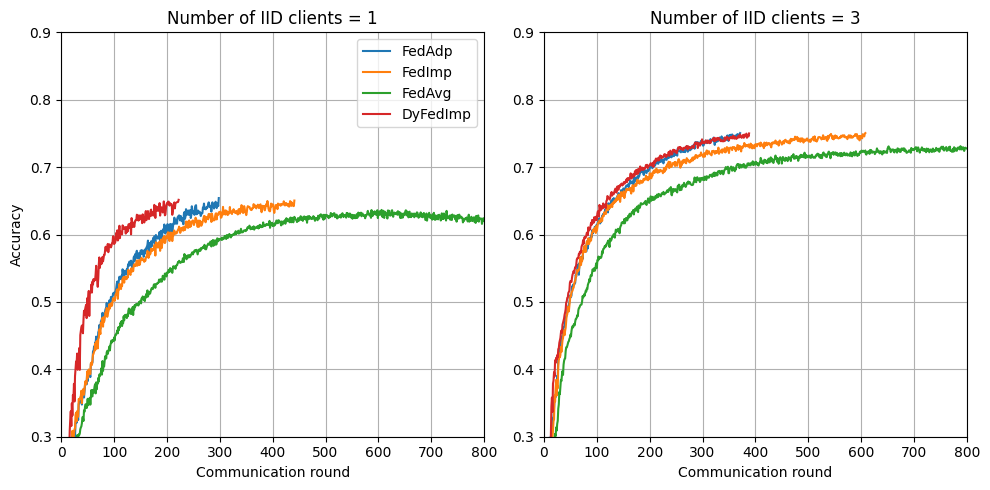

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def trim_data_until_threshold(data, threshold):
    """Cắt dữ liệu tại điểm đầu tiên gặp giá trị y >= threshold"""
    for idx, value in enumerate(data):
        if value >= threshold:
            return data[:idx+1]  # Cắt đến điểm đó (bao gồm cả điểm đạt ngưỡng)
    return data  # Nếu không có giá trị nào đạt ngưỡng, giữ nguyên

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
cases = [1, 3]

y_threshold = [100, 100, 0.83, 0.83]
for idx, i in enumerate(cases):
    # Đọc dữ liệu từ file
    adp = pd.read_csv(f'/content/fedadp{i}.csv')
    avg = pd.read_csv(f'/content/fedavg{i}.csv')
    imp = pd.read_csv(f'/content/fedimp{i}.csv')
    dyimp = pd.read_csv(f'/content/dyfedimp{i}.csv')
    qavg = pd.read_csv(f'/content/qfedavg{i}.csv')
    avgm = pd.read_csv(f'/content/fedavgm{i}.csv')
    prox = pd.read_csv(f'/content/fedprox{i}.csv')



    axs[idx].set_ylim(0.3, 0.9)
    #axs[idx].set_ylim(0.5, 1.5)
    axs[idx].set_xlim(0, 800)
    adp = adp['recall']
    imp = imp['recall']
    dyimp = dyimp['recall']
    avg = avg['recall']
    qavg = qavg['recall']
    avgm = avgm['recall']
    prox = prox['recall']

    adp_trimmed = trim_data_until_threshold(adp, y_threshold[idx])
    imp_trimmed = trim_data_until_threshold(imp, y_threshold[idx])
    avg_trimmed = trim_data_until_threshold(avg, y_threshold[idx])
    dyimp_trimmed = trim_data_until_threshold(dyimp, y_threshold[idx])
    qavg_trimmed = trim_data_until_threshold(qavg, y_threshold[idx])
    avgm_trimmed = trim_data_until_threshold(avgm, y_threshold[idx])
    prox_trimmed = trim_data_until_threshold(prox, y_threshold[idx])

    axs[idx].plot(adp_trimmed, label="FedAdp")
    axs[idx].plot(imp_trimmed, label="FedImp")
    axs[idx].plot(avg_trimmed, label="FedAvg")
    axs[idx].plot(dyimp_trimmed, label="DyFedImp")
    # axs[idx].plot(qavg_trimmed, label="QFedAvg")
    # axs[idx].plot(avgm_trimmed, label="FedAvgM")
    # axs[idx].plot(prox_trimmed, label="FedProx")

    axs[idx].set_title(f'Number of IID clients = {i}')
    axs[idx].set_xlabel('Communication round')

    axs[idx].grid(True)
    if(idx == 0):
      axs[idx].set_ylabel('Accuracy')
      axs[idx].legend()

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

plt.savefig('/content/fmnistcnn.eps', format='eps')

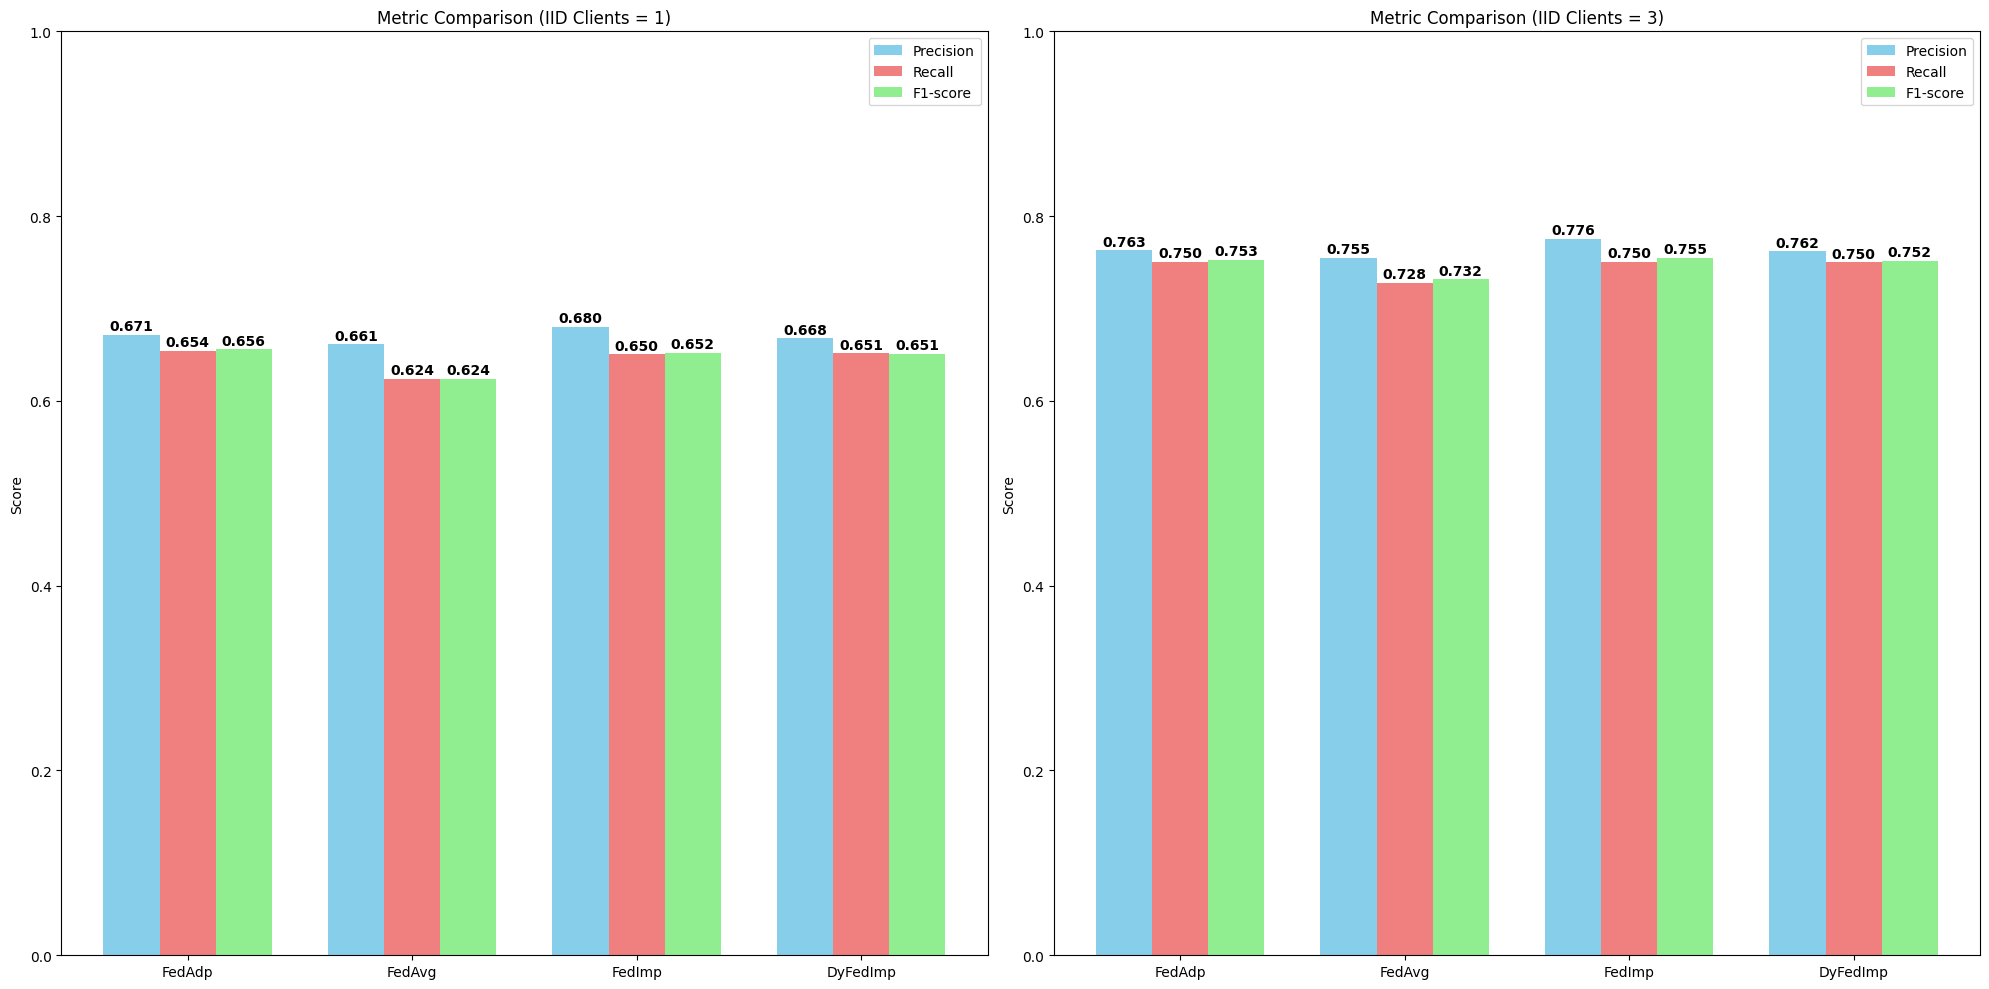

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cases = [1, 3]
labels = ['FedAdp', 'FedAvg', 'FedImp', 'DyFedImp']
colors = ['blue', 'orange', 'green', 'red']  # Màu cho các mô hình

metrics = ['Precision', 'Recall', 'F1-score']
metric_colors = ['skyblue', 'lightcoral', 'lightgreen']  # Màu cho từng chỉ số

fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Tạo 2 subplot ngang

for idx, i in enumerate(cases):
    # Đọc dữ liệu từ file
    adp = pd.read_csv(f'/content/fedadp{i}.csv')
    avg = pd.read_csv(f'/content/fedavg{i}.csv')
    imp = pd.read_csv(f'/content/fedimp{i}.csv')
    dyimp = pd.read_csv(f'/content/dyfedimp{i}.csv')

    # Lấy giá trị Precision, Recall, F1-score cuối cùng
    precision_scores = [adp['precision'].iloc[-1], avg['precision'].iloc[-1],
                        imp['precision'].iloc[-1], dyimp['precision'].iloc[-1]]
    recall_scores = [adp['recall'].iloc[-1], avg['recall'].iloc[-1],
                     imp['recall'].iloc[-1], dyimp['recall'].iloc[-1]]
    f1_scores = [adp['f1_score'].iloc[-1], avg['f1_score'].iloc[-1],
                 imp['f1_score'].iloc[-1], dyimp['f1_score'].iloc[-1]]

    scores = [precision_scores, recall_scores, f1_scores]

    ax = axes[idx]  # Chọn subplot tương ứng
    x = np.arange(len(labels))  # Vị trí trên trục x
    width = 0.25  # Độ rộng của mỗi nhóm cột

    for j, (metric, metric_score) in enumerate(zip(metrics, scores)):
        bars = ax.bar(x + j * width, metric_score, width, label=metric, color=metric_colors[j])

        # Hiển thị giá trị trên mỗi cột
        for bar, v in zip(bars, metric_score):
            ax.text(bar.get_x() + bar.get_width() / 2, v + 0.005, f"{v:.3f}",
                    ha='center', fontsize=10, fontweight='bold')

    ax.set_xticks(x + width)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1])  # Giả định các chỉ số trong khoảng [0,1]
    ax.set_title(f'Metric Comparison (IID Clients = {i})')
    ax.legend()

plt.tight_layout()  # Căn chỉnh layout đẹp hơn
plt.show()


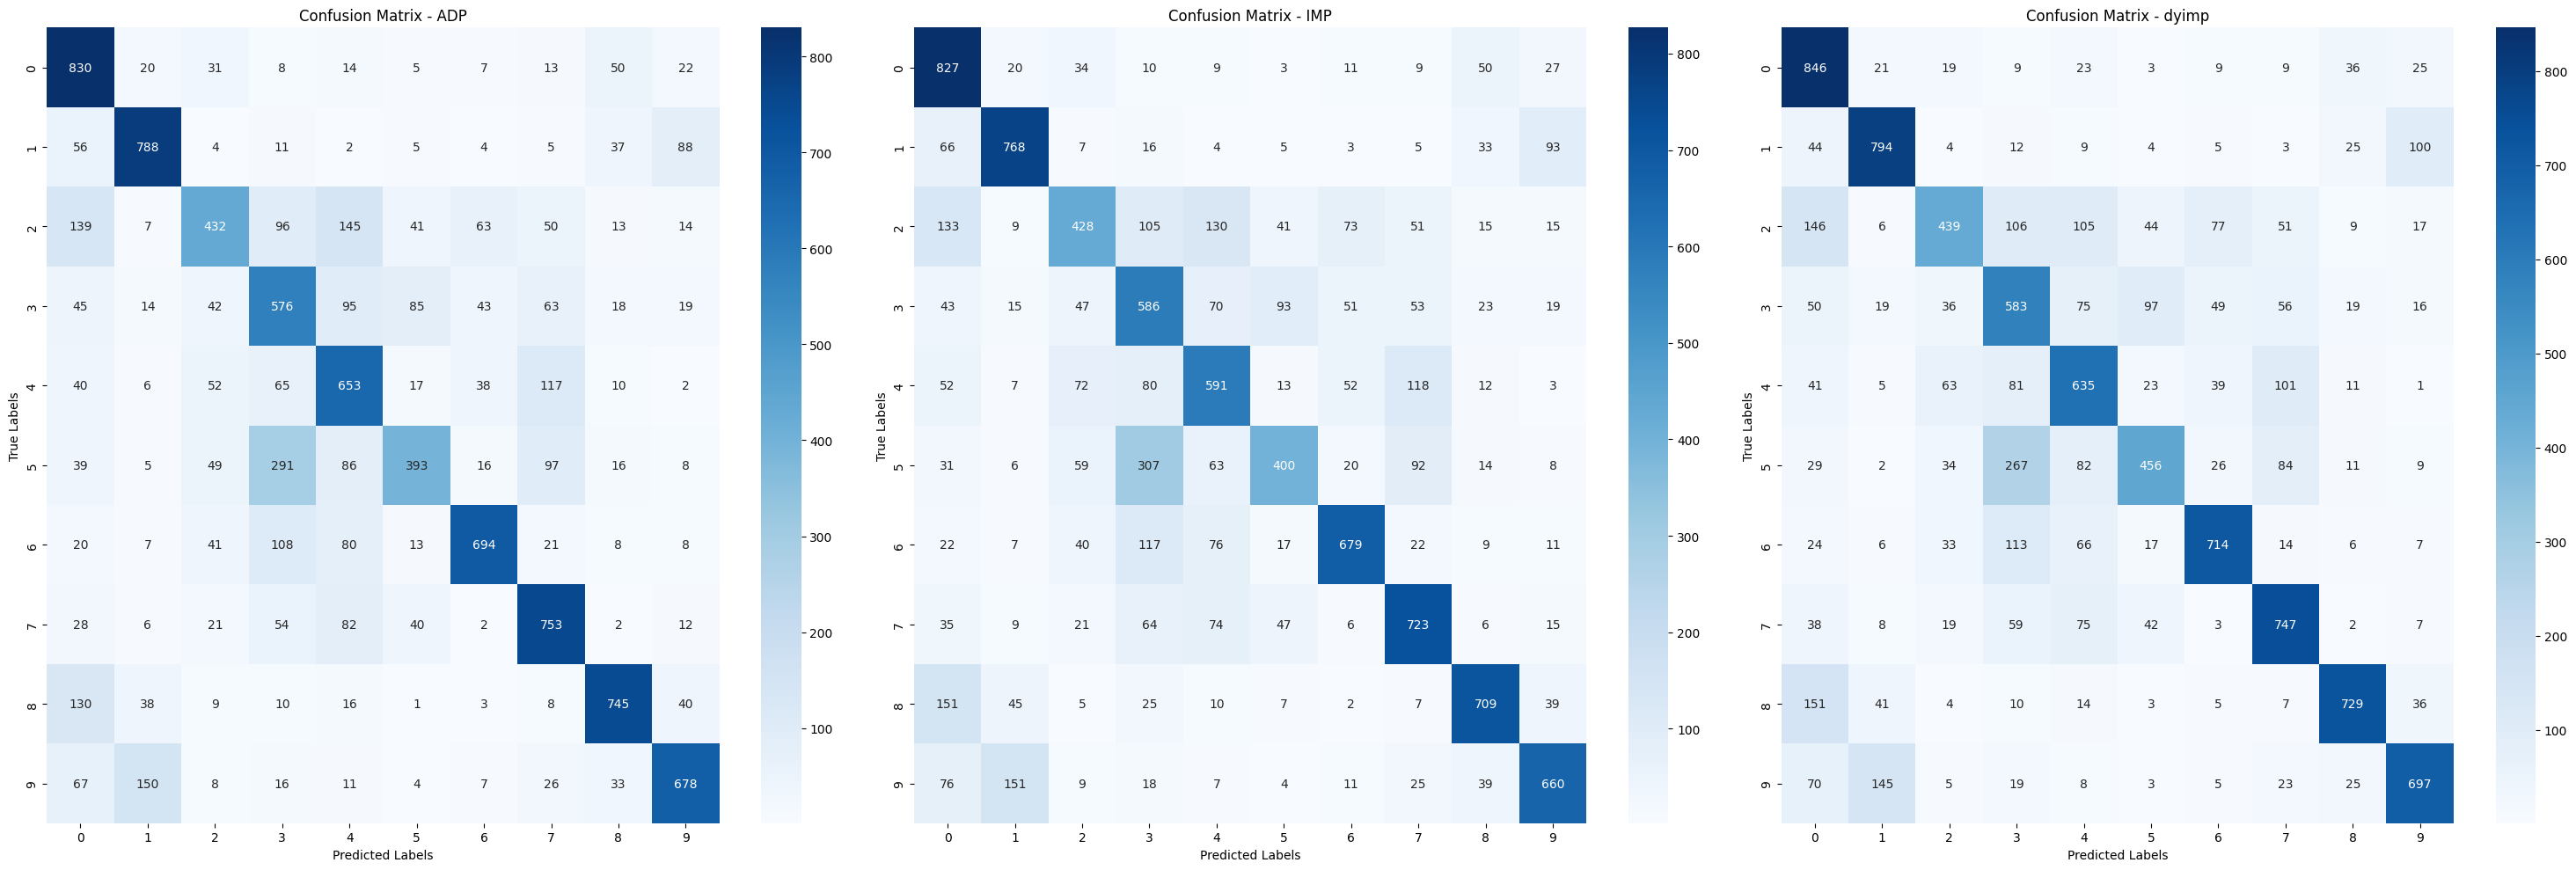

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ các file CSV
adp = pd.read_csv(f'/content/fedadp{1}.csv')
imp = pd.read_csv(f'/content/fedimp{1}.csv')
dyimp = pd.read_csv(f'/content/dyfedimp{1}.csv')

# Tạo hình với 3 subplot (3 ma trận nhầm lẫn)
plt.figure(figsize=(30, 10))  # Kích thước của hình

# Vẽ ma trận nhầm lẫn cho ADP
plt.subplot(1, 3, 1)
sns.heatmap(eval(adp["confusion_matrix"][99]), annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - ADP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Vẽ ma trận nhầm lẫn cho IMP
plt.subplot(1, 3, 2)
sns.heatmap(eval(imp["confusion_matrix"][99]), annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - IMP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

#Vẽ ma trận nhầm lẫn cho AVG
plt.subplot(1, 3, 3)
sns.heatmap(eval(dyimp["confusion_matrix"][99]), annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - dyimp')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Hiển thị hình
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/result/cnn2/0.99/dyfedimp1.csv'

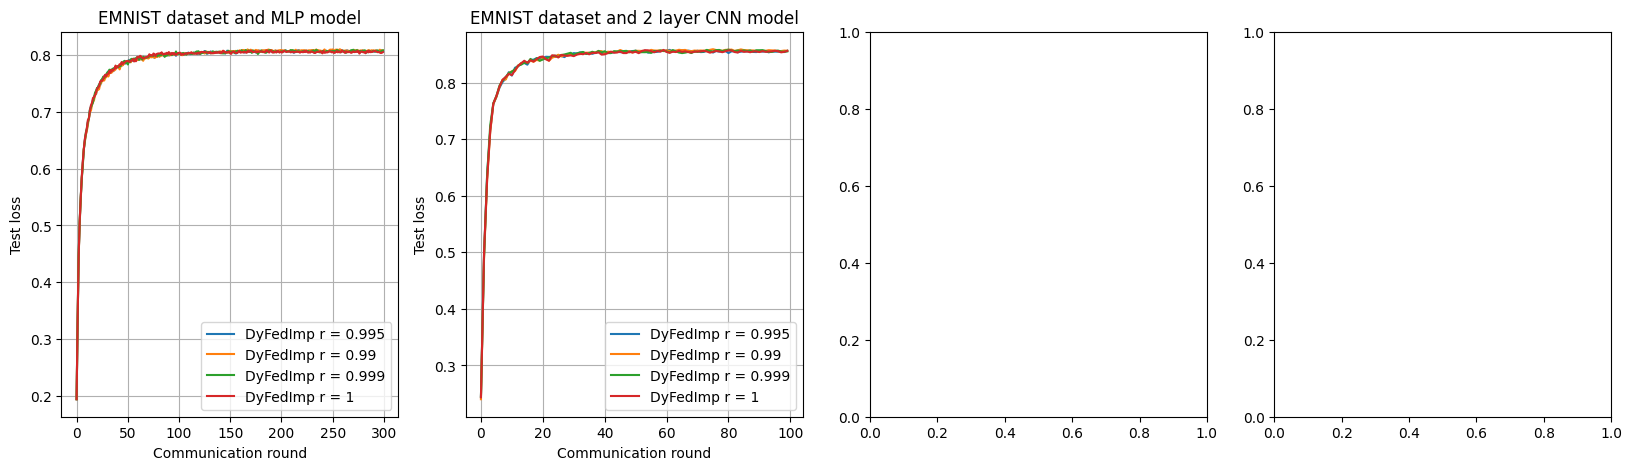

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
cases = ["mlp", "CNN1", "cnn2" ,"cnn4"]
title = ["EMNIST dataset and MLP model", "EMNIST dataset and 2 layer CNN model", "CIFAR-10 dataset and 2 layer CNN  model", "CIFAR-10 dataset and 4 layer CNN  model"]
ylim = [None, None, None, None]
for idx, i in enumerate(cases):
    # Đọc dữ liệu từ file

    dyimp5 = pd.read_csv(f'/content/result/{i}/0.995/dyfedimp1.csv')
    dyimp7 = pd.read_csv(f'/content/result/{i}/0.99/dyfedimp1.csv')
    dyimp9 = pd.read_csv(f'/content/result/{i}/0.999/dyfedimp1.csv')
    dyimp1 = pd.read_csv(f'/content/result/{i}/1/dyfedimp1.csv')

    dyimp5 = dyimp5['test_accuracy']
    dyimp7 = dyimp7['test_accuracy']
    dyimp9 = dyimp9['test_accuracy']
    dyimp1 = dyimp1['test_accuracy']

    axs[idx].plot(dyimp5, label="DyFedImp r = 0.995")
    axs[idx].plot(dyimp7, label="DyFedImp r = 0.99")
    axs[idx].plot(dyimp9, label="DyFedImp r = 0.999")
    axs[idx].plot(dyimp1, label="DyFedImp r = 1")
    axs[idx].set_ylim(ylim[idx])
    axs[idx].set_title(title[idx])
    axs[idx].set_xlabel('Communication round')
    axs[idx].set_ylabel('Test loss')
    axs[idx].legend()
    axs[idx].grid(True)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

plt.savefig('/content/fmnistcnn.eps', format='eps')

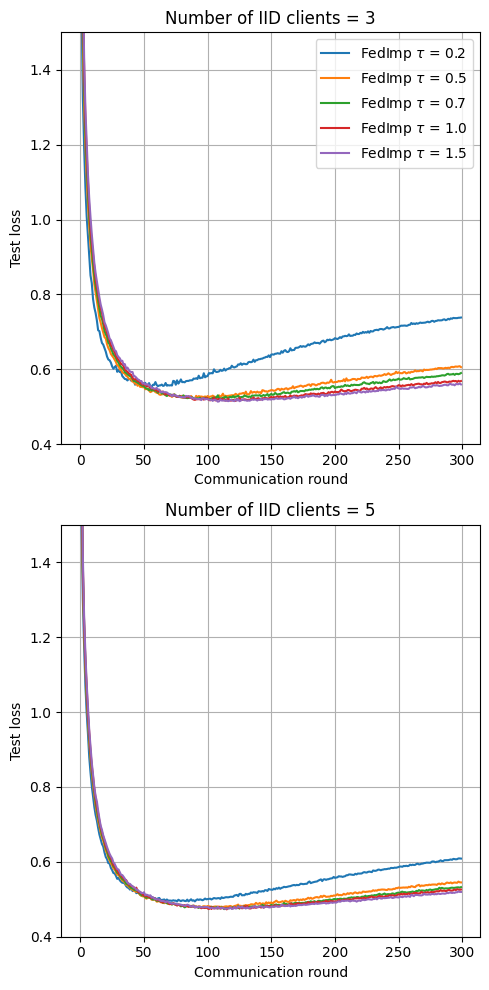

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

fig, axs = plt.subplots(2, 1, figsize=(5, 10))
cases = [3, 5]

for idx, i in enumerate(cases):
    # Đọc dữ liệu từ file

    dyimp02 = pd.read_csv(f'/content/fedimp{i}_0.2.csv')
    dyimp05 = pd.read_csv(f'/content/fedimp{i}_0.5.csv')
    dyimp07 = pd.read_csv(f'/content/fedimp{i}_0.7.csv')
    dyimp1 = pd.read_csv(f'/content/fedimp{i}_1.0.csv')
    dyimp15 = pd.read_csv(f'/content/fedimp{i}_1.5.csv')
    dyimp = pd.read_csv(f'/content/dyfedimp{i}.csv')

    dyimp02 = moving_average(dyimp02['test_loss'], 1)
    dyimp05 = moving_average(dyimp05['test_loss'], 1)
    dyimp07 = moving_average(dyimp07['test_loss'], 1)
    dyimp1 = moving_average(dyimp1['test_loss'], 1)
    dyimp15 = moving_average(dyimp15['test_loss'], 1)
    dyimp = moving_average(dyimp['test_loss'], 1)

    axs[idx].plot(dyimp02, label=r"FedImp $\tau$ = 0.2")
    axs[idx].plot(dyimp05, label=r"FedImp $\tau$ = 0.5")
    axs[idx].plot(dyimp07, label=r"FedImp $\tau$ = 0.7")
    axs[idx].plot(dyimp1, label=r"FedImp $\tau$ = 1.0")
    axs[idx].plot(dyimp15, label=r"FedImp $\tau$ = 1.5")
    #axs[idx].plot(dyimp, label="DyFedImp")
    axs[idx].set_ylim(0.4, 1.5)
    axs[idx].set_title(f'Number of IID clients = {i}')
    axs[idx].set_xlabel('Communication round')
    axs[idx].set_ylabel('Test loss')
    axs[idx].grid(True)
    if idx == 0:
      axs[idx].legend()

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

plt.savefig('/content/fmnistcnn.eps', format='eps')